# SVM for fault classification: Evaporator System

Reference: Pilario, Cao, Shafiee (2021). A Kernel Design Approach to Kernel Subspace Identification. IEEE Transactions on Industrial Electronics, 68(7), 6171-6180. doi: 10.1109/TIE.2020.2996142 

MATLAB File Exchange: https://www.mathworks.com/matlabcentral/fileexchange/68641-newell-lee-evaporator-system-for-system-identification

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv('evap_data.csv')
df.head()

,L2,P2,X2,Status
0,1.044823,50.398740,27.086354,Normal
1,1.008144,50.278103,22.925328,Normal
2,1.020359,51.458076,26.585295,Normal
3,0.974483,50.500776,24.569275,Normal
4,1.044522,50.482284,23.723251,Normal


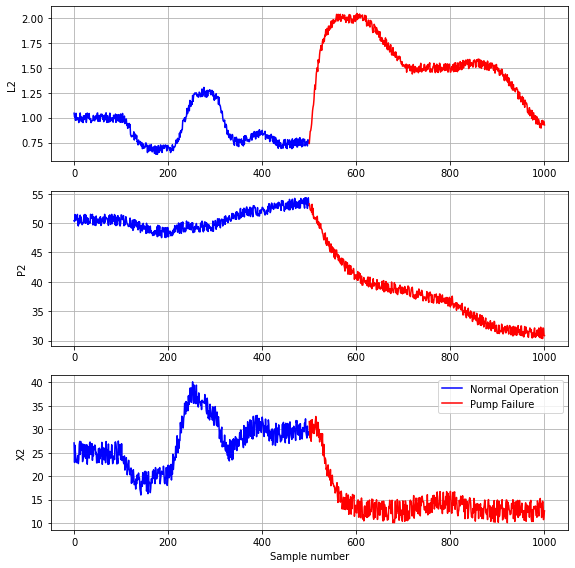

In [3]:
plt.figure(figsize=(8,8))

class_0 = df.index[df['Status'] == 'Normal']
class_1 = df.index[df['Status'] == 'Pump_failure']

plt.subplot(3,1,1)
plt.plot(class_0, df.iloc[class_0]["L2"], 'b')
plt.plot(class_1, df.iloc[class_1]["L2"], 'r')
plt.grid()
plt.ylabel('L2')

plt.subplot(3,1,2)
plt.plot(class_0, df.iloc[class_0]["P2"], 'b')
plt.plot(class_1, df.iloc[class_1]["P2"], 'r')
plt.grid()
plt.ylabel('P2')

plt.subplot(3,1,3)
plt.plot(class_0, df.iloc[class_0]["X2"], 'b', label='Normal Operation')
plt.plot(class_1, df.iloc[class_1]["X2"], 'r', label='Pump Failure')
plt.grid()
plt.legend()
plt.ylabel('X2')
plt.xlabel('Sample number')

plt.tight_layout()
plt.show()

In [4]:
X = df.iloc[:,:3].to_numpy()
y = LabelEncoder().fit_transform(df.iloc[:,-1])

X_train, X_2, y_train, y_2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, stratify=y_2, random_state=0)

## Normalize the data set

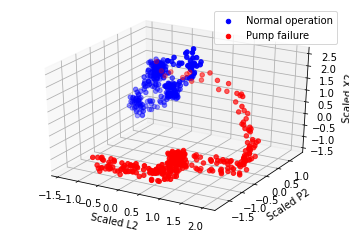

In [5]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

N_train = len(X_train_scaled)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_scaled[y_train == 0,0], 
           X_train_scaled[y_train == 0,1], 
           X_train_scaled[y_train == 0,2], 
           c='b', label='Normal operation')

ax.scatter(X_train_scaled[y_train == 1,0], 
           X_train_scaled[y_train == 1,1], 
           X_train_scaled[y_train == 1,2], 
           c='r', label='Pump failure')
ax.set_xlabel('Scaled L2')
ax.set_ylabel('Scaled P2')
ax.set_zlabel('Scaled X2')
plt.legend()
plt.show()

## Train the SVM

In [6]:
box_C = np.array([1, 1, 1, 10, 10, 10, 100, 100, 100])
gamma = np.array([0.1, 1, 2, 0.1, 1, 2, 0.1, 1, 2])

for i in range(len(box_C)):

    print(f"Box Constraint: {box_C[i]}, gamma = {gamma[i]}")
    mdl = SVC(C=box_C[i], gamma=gamma[i]).fit(X_train_scaled, y_train)

    y_pred_train = mdl.predict(X_train_scaled)
    y_pred_val = mdl.predict(X_val_scaled)
    y_pred_test = mdl.predict(X_test_scaled)
    
    print(f"  Accuracy for training: {mdl.score(X_train_scaled, y_train)}")
    cm_train = confusion_matrix(y_train, y_pred_train)
    print(cm_train)
    
    print(f"  Accuracy for validation: {mdl.score(X_val_scaled, y_val)}")
    cm_val = confusion_matrix(y_val, y_pred_val)
    print(cm_val)
    
    print(f"  Accuracy for testing: {mdl.score(X_test_scaled, y_test)}")
    cm_test = confusion_matrix(y_test, y_pred_test)
    print(cm_test)
    
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    #disp.plot()
    #plt.show()

    #disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
    #disp.plot()
    #plt.show()

    #disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    #disp.plot()
    #plt.show()

Box Constraint: 1, gamma = 0.1
  Accuracy for training: 0.98
[[300   0]
 [ 12 288]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9800995024875622
[[100   0]
 [  4  97]]
Box Constraint: 1, gamma = 1.0
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9900497512437811
[[100   0]
 [  2  99]]
Box Constraint: 1, gamma = 2.0
  Accuracy for training: 0.9866666666666667
[[300   0]
 [  8 292]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9900497512437811
[[100   0]
 [  2  99]]
Box Constraint: 10, gamma = 0.1
  Accuracy for training: 0.9816666666666667
[[300   0]
 [ 11 289]]
  Accuracy for validation: 0.995
[[100   0]
 [  1  99]]
  Accuracy for testing: 0.9850746268656716
[[100   0]
 [  3  98]]
Box Constraint: 10, gamma = 1.0
  Accuracy for training: 0.99
[[300   0]
 [  6 294]]
  Accuracy for validation: 0.995
[[100   0]
 [  

## Train using L2 and P2 only (for illustration purposes)

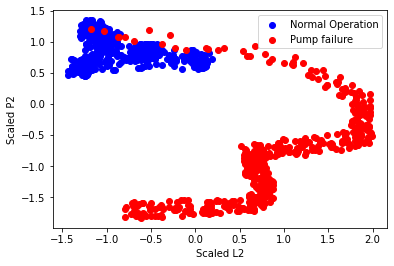

In [7]:
X = df.iloc[:,:2].to_numpy()
y = LabelEncoder().fit_transform(df.iloc[:,-1])

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

plt.scatter(X_scaled[y == 0,0], X_scaled[y == 0, 1], c='b', label='Normal Operation')
plt.scatter(X_scaled[y == 1,0], X_scaled[y == 1, 1], c='r', label='Pump failure')
plt.xlabel('Scaled L2')
plt.ylabel('Scaled P2')
plt.legend()
plt.show()

<Figure size 1080x720 with 0 Axes>

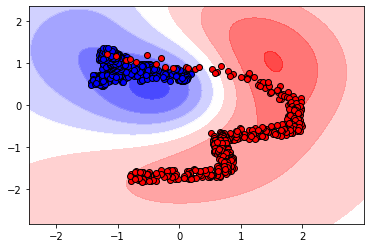

In [8]:
mdl = SVC().fit(X_scaled, y)

plt.figure(figsize=(15,10))
DecisionBoundaryDisplay.from_estimator(mdl, X_scaled, cmap='bwr', alpha=0.8)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], c='b', edgecolors="k")
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], c='r', edgecolors="k")
plt.show()